**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
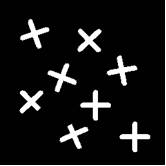
art8lab1.png: 
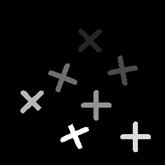
art8lab2.png: 
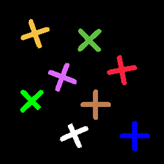
		

Text(0.5, 1.0, 'Tamanho da imagem : (256, 256, 3)')

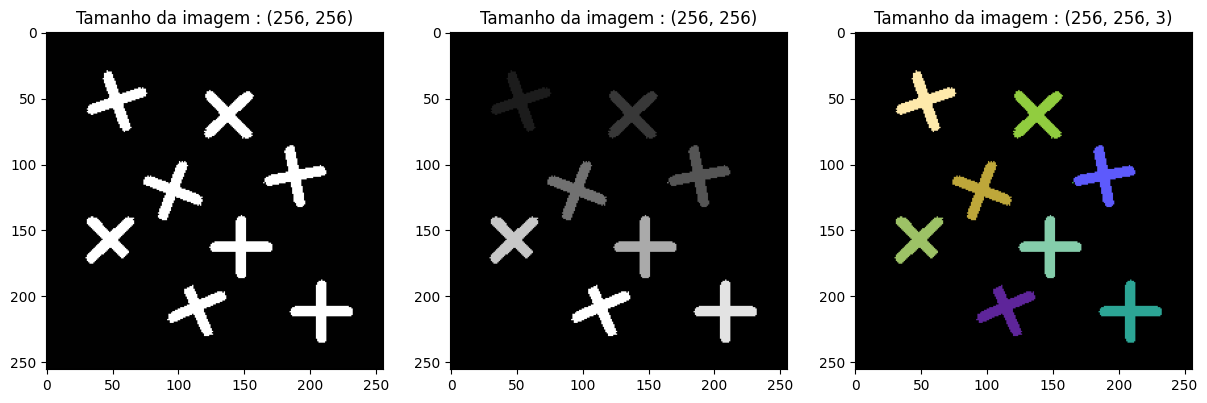

In [38]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from random import randint

def randomColor():
    return [randint(0,255), randint(0,255), randint(0,255)]



img = cv.imread("art8.png", cv.IMREAD_GRAYSCALE)
linhas, colunas = img.shape
label = np.zeros((linhas,colunas))
newLabel = 1
sameLabel = []

for i in range(1,linhas):
    for j in range(1,colunas):
        if img[i][j] > 100:
            if (label[i-1][j] != 0 and label[i][j-1] != 0) and label[i-1][j] != label[i][j-1]:

                label[i][j] = label[i-1][j]

                sameLabel.append([label[i-1][j], label[i][j-1]])

            elif label[i-1][j] != 0:
                label[i][j] = label[i-1][j]
            elif label[i][j-1] != 0:
                label[i][j] = label[i][j-1]
            else:
                label[i][j] = newLabel
                newLabel = newLabel + 1
        else:
            pass


finalSames = []
for same in sameLabel:
    noMatch = True
    for i in range(len(finalSames)):
        if np.intersect1d(same,finalSames[i]).any():
            finalSames[i] = np.concatenate((same, finalSames[i]))
            noMatch = False
    if noMatch:
        finalSames.append(same)


for same in finalSames:
    for element in same:
        label[label == element] = np.min(same)
    
intensidades = np.unique(label)
novaIntensidade = 0
novaImg = np.copy(label)
colorImg = np.zeros((label.shape[0], label.shape[1], 3), np.uint8)

for i in np.sort(intensidades):
    novaImg[label == i] = novaIntensidade
    if i != 0:
        colorImg[label == i] = randomColor()
    
    novaIntensidade = novaIntensidade + 1



figura = plt.figure(figsize = (20,20))

figura.add_subplot(2,4,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title(f'Tamanho da imagem : {img.shape}')

figura.add_subplot(2,4,2)
plt.imshow(novaImg, cmap='gray', vmin=0, vmax=np.max(np.unique(novaImg)))
plt.title(f'Tamanho da imagem : {novaImg.shape}')

figura.add_subplot(2,4,3)
plt.imshow(colorImg)
plt.title(f'Tamanho da imagem : {colorImg.shape}')

2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

Utilizando threshold de 170
Quantidade de objetos detectados: 220.0


Text(0.5, 1.0, 'Imagem Colorida\n')

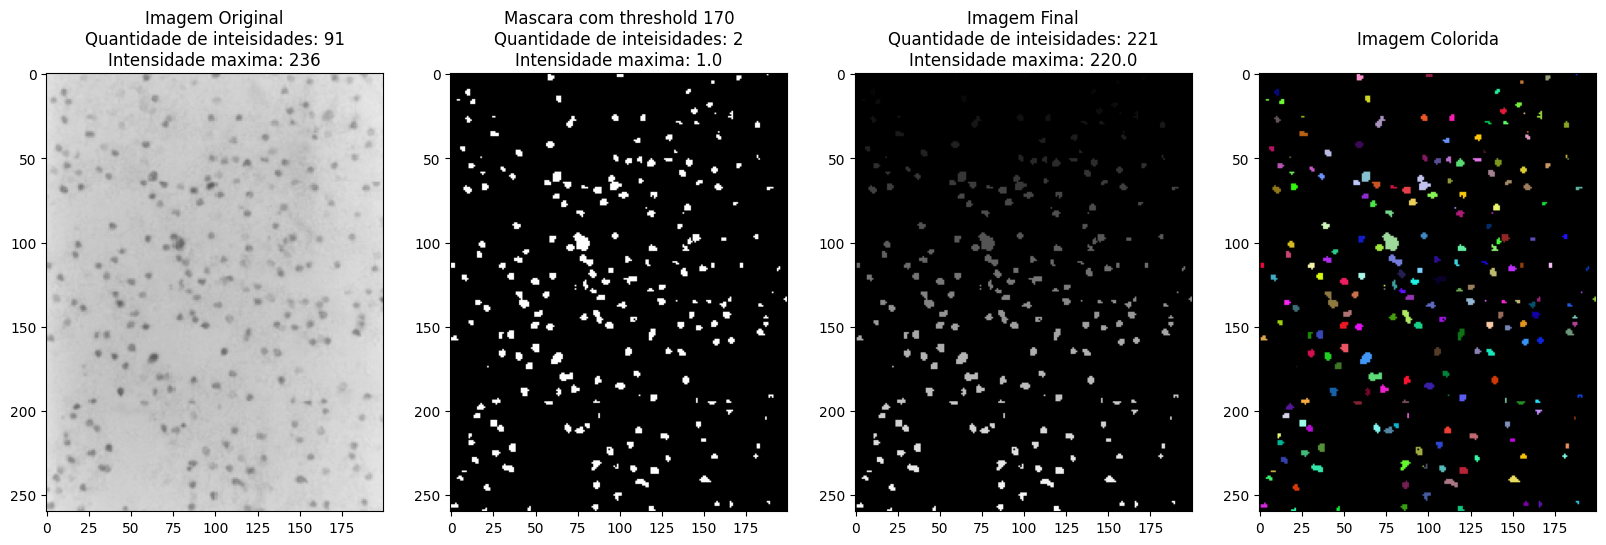

In [42]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

filename = "clc3.png"

img = cv.imread(filename, cv.IMREAD_GRAYSCALE)

def randomColor():
    return [randint(0,255), randint(0,255), randint(0,255)]

# Criando mascara com threshold determinado
fundoBranco = True
threshold = 170
maskImg = np.zeros(img.shape)
if fundoBranco:
    maskImg[img <= threshold] = 1
    maskImg[img > threshold] = 0
else:
    maskImg[img >= threshold] = 1
    maskImg[img < threshold] = 0

# Criando matriz para salvar as labels
linhas, colunas = img.shape
label = np.zeros((linhas,colunas))
newLabel = 1
sameLabel = []

# Preenchendo matriz de labels e salvando pares de labels equivalentes
for i in range(1,linhas):
    for j in range(1,colunas):
        if maskImg[i][j] == 1:
            if (label[i-1][j] != 0 and label[i][j-1] != 0) and label[i-1][j] != label[i][j-1]:
                label[i][j] = label[i-1][j]
                sameLabel.append([label[i-1][j], label[i][j-1]])

            elif label[i-1][j] != 0:
                label[i][j] = label[i-1][j]
            elif label[i][j-1] != 0:
                label[i][j] = label[i][j-1]
            else:
                label[i][j] = newLabel
                newLabel = newLabel + 1
        else:
            pass

# Concatenando pares de labels equivalentes (Ex: Se 1 e 2 sao equivalentes, e 2 e 3 sao equivalentes, entao 1, 2 e 3 sao equivalentes)
finalSames = []
for same in sameLabel:
    noMatch = True
    for i in range(len(finalSames)):
        if np.intersect1d(same,finalSames[i]).any():
            finalSames[i] = np.concatenate((same, finalSames[i]))
            noMatch = False
    if noMatch:
        finalSames.append(same)

# Substituindo todas as labels equivalentes pela menor label
for same in finalSames:
    for element in same:
        label[label == element] = np.min(same)

# Subistituindo valores das labels para remover intervalos (Ex: Caso as labels sejam [1, 5, 94 ,155] se tornarao [1, 2, 3, 4])
intensidades = np.unique(label)
novaIntensidade = 0
novaImg = np.copy(label)
colorImg = np.zeros((label.shape[0], label.shape[1], 3), np.uint8)
for i in np.sort(intensidades):
    novaImg[label == i] = novaIntensidade
    novaIntensidade = novaIntensidade + 1
    if i != 0:
        colorImg[label == i] = randomColor()

# Printando o resultado de quantos objetos foram identificados para dado threshrold
print(f'Utilizando threshold de {threshold}')
print(f'Quantidade de objetos detectados: {np.max(np.unique(novaImg))}')

# Plotando as imagens
figura = plt.figure(figsize = (20,20))

figura.add_subplot(2,4,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title(f'Imagem Original\nQuantidade de inteisidades: {len(np.unique(img))}\nIntensidade maxima: {np.max(np.unique(img))}')

figura.add_subplot(2,4,2)
plt.imshow(maskImg, cmap='gray', vmin=0, vmax=np.max(np.unique(maskImg)))
plt.title(f'Mascara com threshold {threshold}\nQuantidade de inteisidades: {len(np.unique(maskImg))}\nIntensidade maxima: {np.max(np.unique(maskImg))}')

figura.add_subplot(2,4,3)
plt.imshow(novaImg, cmap='gray', vmin=0, vmax=np.max(np.unique(novaImg)))
plt.title(f'Imagem Final\nQuantidade de inteisidades: {len(np.unique(novaImg))}\nIntensidade maxima: {np.max(np.unique(novaImg))}')

figura.add_subplot(2,4,4)
plt.imshow(colorImg)
plt.title(f'Imagem Colorida\n')